<a href="https://colab.research.google.com/github/Leena-GO/Self-study/blob/main/foundation_of_mathematics_with_python/2)_%EC%9E%85%EB%A0%A5%EA%B3%BC_%EC%B6%9C%EB%A0%A5%EC%9D%98_%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
D1 = np.array([[1.0,1.2,3,4,5,6],[1.5,3,2.3,5.3,3.8,5.5]])
num_iters = 300
eta = 0.02

In [26]:
np.random.seed(2)

w = np.random.randn(2) # w를 아무렇게나 초기화 시키기
N = D1.shape[1]
n = D1.shape[0]

ws,L = [],[]

In [27]:
#1열에는 숫자 1이 있고, 2열에는 데이터의 x좌표가 있는 행렬 X 만들기

X = np.c_[np.ones(N), D1[0]]
y = D1[1]

In [28]:
# 경험 E를 반복하며 태스크 T를 개선하기

for i in range(num_iters):
  # 안전장치 식 (경사도 벡터)
  c = (1/N) * np.dot(X.T, np.dot(X,w) - y)
  
  # 안전장치를 이용하여 w 수정하기 
  w -= eta * c

  #w가 변화되는 과정 저장
  ws.append(w)

  # 손실 계산하기
  L.append(((np.dot(X, w) - y) **2).sum() / (2/N))

In [29]:
def machine_learning(D):
  N = D.shape[1] # 데이터의 개수 할당
  X = np.c_[np.ones(N), D[0]]
  y = D[1]

  w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T,y))
  return w



def more_clever(D): # 두 점을 지나는 직선 구하기
  first, last = D[:,0], D[:,-1]
  w1 = (last[1] - first[1]) / (last[0]-first[0])
  w0 = -w1 * first[0] + first[1]
  return(w0,w1)




def f(x,w):
  return w[1] * x + w[0]

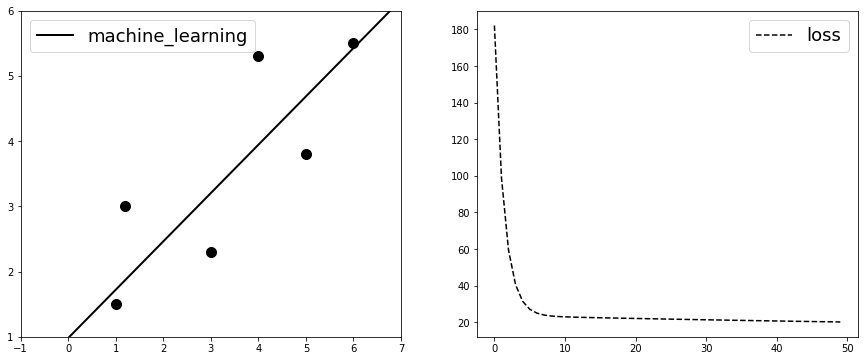

In [30]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize = 10)
ax1.plot(x, f(x,w), c = 'k', lw = 2, label = 'machine_learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize = 18)

ax2.plot(L[:50], '--', c = 'k', label = 'loss')
ax2.legend(fontsize = 18)
plt.show()

- iters를 조정하면 점과 점 사이를 정확하게 관통하는 직선을 구할 수 있게 된다.
- 오른쪽 그래프는 정의한 손실을 매 반복마다 그린 것